<a id="top"></a>
# NLP Hotel Review Classification
---
### *Notebook 2/3: Initial Model Building*
---

## Contents
---

**1.  [Data Reading & Preparation](#data_reading_prep)** <br>
**2.  [Model Building & Hyperparameter Tuning](#model_building)** <br>
**3.  [Model Evaluation](#model_evaluation)** <br>

---

<a id="data_reading_prep"></a>
## 1. Data Reading & Preparation

In [1]:
# Import libraries for model building

# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Preprocessing and evaluation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Models
from model_trainer import TrainModel
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from lightgbm import LGBMClassifier

In [2]:
# Read in data
df = pd.read_csv('drive/MyDrive/data/df_final.csv')

In [3]:
# Check data
df

,Review,Rating
0,ok nothing special charge diamond member hilto...,2
1,nice room not experience hotel monaco seattle ...,3
2,excellent staff housekeeping quality hotel cho...,4
3,poor value stayed monaco seattle july nice hot...,2
4,nice hotel not nice staff hotel lovely staff q...,3
...,...,...
18535,dirty hall dirty room nothing work tv didn wor...,1
18536,confortable room staff kind available polite g...,5
18537,stayed attending itb berlin heating system hot...,2
18538,hotel well located adenauerplatz ku damm reaso...,2


In [4]:
# Save all class names
class_names = np.sort(df['Rating'].unique()).tolist()

In [5]:
# Isolate features and labels
X = df['Review']
y = df['Rating']

In [6]:
# Split data into training, validation and testing - 80/10/10

# Train 80%, Test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                        stratify=y, random_state=42)

# Valid 10%, Test 10%
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, 
                                                        stratify=y_test, random_state=42)

In [7]:
# Check shape of data
print('Shape of Data:')
print('-'*20)
print(f'X_train: {X_train.shape}\ny_train: {y_train.shape} ')
print('-'*20)
print(f'X_valid: {X_valid.shape}\ny_valid: {y_valid.shape} ')
print('-'*20)
print(f'X_test: {X_test.shape}\ny_test: {y_test.shape} ')

Shape of Data:
--------------------
X_train: (14832,)
y_train: (14832,) 
--------------------
X_valid: (1854,)
y_valid: (1854,) 
--------------------
X_test: (1854,)
y_test: (1854,) 


<a id="model_building"></a>
## 2. Model Building & Hyperparamter Tuning
---

For the intial modelling phase, we will first get a baseline from a simple Decision Tree Classifier and then continue to build from there. To identify optimal hyperparameters, I have created a class (TrainModel) that will perform a grid search using a 3-fold stratified cross validation. We will also create a pipeline that vectorizes our data using the TF-IDF Vectorizer before passing it to our estimator.

In [8]:
# Decision Tree (baseline)
model = DecisionTreeClassifier(random_state=42)
params = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__min_samples_leaf': [50, 100],
    'clf__max_depth': [5, 10]
}

# Create pipeline
dt_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', model)
])

# Train model
dt_model = TrainModel(dt_pipe, params, X_train, X_valid, y_train, y_valid)
dt_model.train()

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 10.4min finished


In [9]:
# Linear SVC
model = LinearSVC(random_state=42)
params = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': [0.1, 0.01]
}

# Create pipeline
lsvc_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', model)
])

# Train model
lsvc_model = TrainModel(lsvc_pipe, params, X_train, X_valid, y_train, y_valid)
lsvc_model.train()

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  3.4min finished


In [12]:
# Naive Bayes
model = MultinomialNB()
params = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__alpha': [1, 0.1, 0.01]
}

# Create pipeline
nb_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', model)
])

# Train model
nb_model = TrainModel(nb_pipe, params, X_train, X_valid, y_train, y_valid)
nb_model.train()

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  4.9min finished


In [13]:
# Logistic Regression
model = LogisticRegression(random_state=42, max_iter=1000)
params = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__solver': ['newton-cg', 'liblinear'],
    'clf__C': [1.0, 0.1]
}

# Create pipeline
log_reg_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', model)
])

# Train model
log_reg_model = TrainModel(log_reg_pipe, params, X_train, X_valid, y_train, y_valid)
log_reg_model.train()

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 14.0min finished


In [14]:
# KNN
model = KNeighborsClassifier()
params = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__n_neighbors': range(3, 11, 2),
}

# Create pipeline
knn_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', model)
])

# Train model
knn_model = TrainModel(knn_pipe, params, X_train, X_valid, y_train, y_valid)
knn_model.train()

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 10.5min finished


In [15]:
# Random Forest
model = RandomForestClassifier(n_estimators=500, random_state=42)
params = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__max_depth': [20, 30],
    'clf__min_samples_leaf': [15, 30]
}

# Create pipeline
rf_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', model)
])

# Train model
rf_model = TrainModel(rf_pipe, params, X_train, X_valid, y_train, y_valid)
rf_model.train()

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 18.8min finished


In [16]:
# Ridge Classifier
model = RidgeClassifier(random_state=42)
params = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__alpha': np.arange(0.5, 1.1, 0.1)
}

# Create pipeline
rc_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', model)
])

# Train model
rc_model = TrainModel(rc_pipe, params, X_train, X_valid, y_train, y_valid)
rc_model.train()

Fitting 3 folds for each of 63 candidates, totalling 189 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed: 15.9min finished


In [17]:
# SGD
model = SGDClassifier(random_state=42)
params = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__loss': ['hinge', 'log'],
    'clf__alpha': [0.0001, 0.001, 0.01],
    'clf__penalty': ['l2', 'l1']
}

# Create pipeline
sgd_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', model)
])

# Train model
sgd_model = TrainModel(sgd_pipe, params, X_train, X_valid, y_train, y_valid)
sgd_model.train()

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 24.2min finished


Now let's try a few ensemble approaches to see if we can improve the accuracy.

In [18]:
# Light GBM
model = LGBMClassifier(random_state=42)
params = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
}

# Create pipeline
lgbm_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', model)
])

# Train model
lgbm_model = TrainModel(lgbm_pipe, params, X_train, X_valid, y_train, y_valid)
lgbm_model.train()

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 41.5min finished


In [19]:
# AdaBoost
model = AdaBoostClassifier(base_estimator=rc_model.best_estimator.named_steps['clf'], 
                           algorithm='SAMME', random_state=42)
params = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__learning_rate': [0.1 , 1]
}

# Create pipeline
adb_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', model)
])

# Train model
adb_model = TrainModel(adb_pipe, params, X_train, X_valid, y_train, y_valid)
adb_model.train()

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 28.7min finished


In [20]:
# Voting Classifier

# Create pipeline
vc_pipe = Pipeline([
        ('tfidf', TfidfVectorizer()),    
        ('clf', VotingClassifier(estimators=[
            ("vc1", log_reg_model.best_estimator.named_steps['clf']), 
            ("vc2", sgd_model.best_estimator.named_steps['clf'])]))
])

# Params
params = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__voting': ['hard', 'soft']
}

# Train model
vc_model = TrainModel(vc_pipe, params, X_train, X_valid, y_train, y_valid)
vc_model.train()

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 13.8min finished


In [21]:
# Stacking Classifier

# Create pipeline
sc_pipe = Pipeline([
        ('tfidf', TfidfVectorizer()),    
        ('clf', StackingClassifier(estimators=[
            ("sc1", log_reg_model.best_estimator.named_steps['clf']),
            ("sc2", rf_model.best_estimator.named_steps['clf']), 
            ("sc3", sgd_model.best_estimator.named_steps['clf'])],
            final_estimator=LogisticRegression(max_iter=2000)))
])

# Params
params = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
}

# Train model
sc_model = TrainModel(sc_pipe, params, X_train, X_valid, y_train, y_valid)
sc_model.train()

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 99.9min finished


In [22]:
# All models
all_models = [dt_model, lsvc_model, nb_model, log_reg_model, knn_model, rf_model, 
              rc_model, sgd_model, lgbm_model, adb_model, vc_model, sc_model]

In [26]:
# Save all models
for m in all_models:
    pickle.dump(m, open(f'drive/MyDrive/models/{m.model_name}.pkl', 'wb'))

<a id="model_evaluation"></a>
## 3. Model Evaluation
---

Finally, let's evaluate the performance of all of the models we tested. We'll start by generating confusion matrices for all of the models. This will give us a good understanding of how each model performed on the validation data.

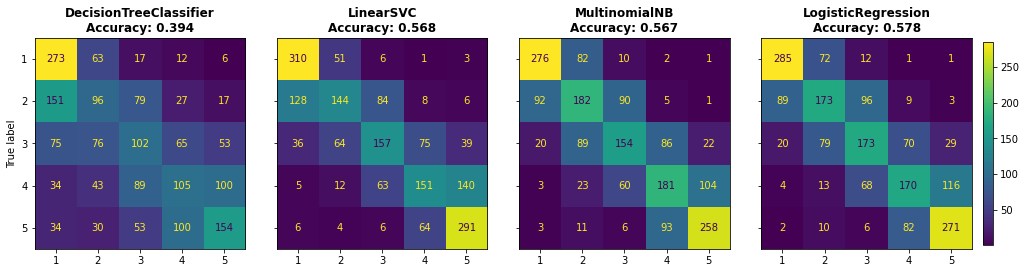

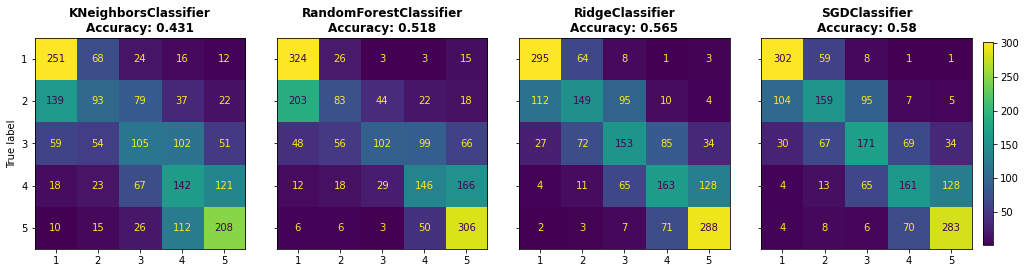

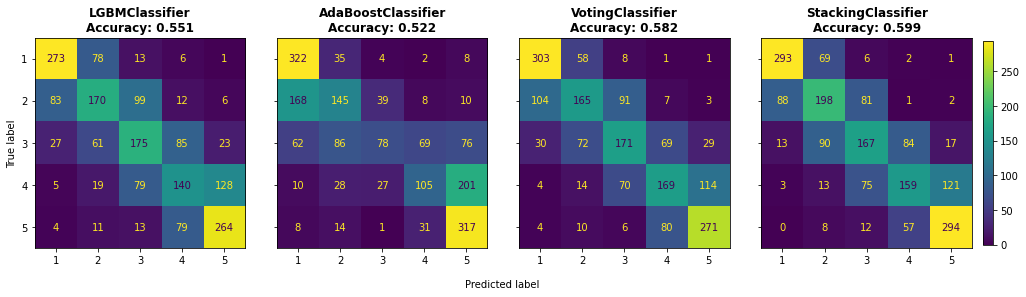

In [31]:
# Confusion matrices and accuracy for each model
for i in range(3):
    f, axs = plt.subplots(1, 4, figsize=(20, 5), sharey='row')
    for j, m in enumerate(all_models[i*4:(i+1)*4]):
        disp = ConfusionMatrixDisplay(m.confusion_matrix, display_labels=class_names)
        disp.plot(ax=axs[j])
        disp.ax_.set_title(f'{m.model_name}\nAccuracy: {m.accuracy}', fontweight='bold')
        disp.im_.colorbar.remove()
        disp.ax_.grid(False)
        disp.ax_.set_xlabel('')
        if j != 0:
            disp.ax_.set_ylabel('')
    if i == 2:
        f.text(0.45, 0.1, 'Predicted label', ha='center')
    plt.subplots_adjust(wspace=0.15, hspace=0.1)
    f.colorbar(disp.im_, ax=axs, shrink=0.75, pad=0.01)
    plt.show()

We can see that most of the models achieved an accuracy approaching 0.6 with the Stacking Classifier just coming out on top. However, this model did take the longest to train at 99.9 mins and only scored marginally better than some of the other models, such as the Voting Classifier, which finished training in a fraction of the time at 13.8 mins.

While an accuracy of 0.6 isn't particularly great, it is much better than a random guess which would have an accuracy of 0.2. In addition, we can see that the majority of the models are mostly getting confused with ratings that are close to each other e.g. predicting a rating of 4 when the actual rating was a 5. This is understandable and it is likely that people would also be unable to distinguish the difference between a rating of 4 or 5.

Below is a more detailed breakdown of the models' performance.

In [32]:
# Model summary
def model_summary(models):
    stats = [(m.model_name, m.accuracy, m.precision, m.f1) for m in models]
    df = pd.DataFrame(stats, columns=['model', 'accuracy', 'precision', 'f1-score']).set_index('model')
    return df

df_models = model_summary(all_models)
df_models.style.highlight_max(axis=0, color='#b3ff66').format("{:.3}")

,accuracy,precision,f1-score
model,,,
DecisionTreeClassifier,0.394,0.38,0.38
LinearSVC,0.568,0.554,0.553
MultinomialNB,0.567,0.563,0.564
LogisticRegression,0.578,0.571,0.573
KNeighborsClassifier,0.431,0.418,0.419
RandomForestClassifier,0.518,0.508,0.482
RidgeClassifier,0.565,0.552,0.554
SGDClassifier,0.58,0.569,0.57
LGBMClassifier,0.551,0.544,0.546


In [33]:
# Look at parameters of best model (StackingClassifier)
best_model = sc_model.best_estimator
best_model

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.75)),
                ('clf',
                 StackingClassifier(estimators=[('sc1',
                                                 LogisticRegression(max_iter=1000,
                                                                    random_state=42,
                                                                    solver='newton-cg')),
                                                ('sc2',
                                                 RandomForestClassifier(max_depth=30,
                                                                        min_samples_leaf=15,
                                                                        n_estimators=500,
                                                                        random_state=42)),
                                                ('sc3',
                                                 SGDClassifier(loss='log',
                                                          

Here, we can see the hyperparameters that were chosen for the Stacking Classifier.

Let's use this model to predict our test set. This will help us to see if the model is likely to generalise well.

In [34]:
# Predict test set
preds = best_model.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, preds):.3f}')

Accuracy Score: 0.605


That's good. The accuracy is very similar to what was achieved on the validation data. This means that our model should generalise well. Finally, let's train the model on the training and validation data.

In [36]:
# Train model on entire training set 

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

# Fit data
best_model.fit(X_train, y_train)
preds_all = best_model.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, preds_all):.3f}')

Accuracy Score: 0.599


Again, we see that the accuracy is consistent so we can be confident with the model. In the next and final notebook, we will explore deep learning techniques as well as pretrained models to see if we can improve upon our current best model.

**[Back to Top](#top)**